# Grand Oral de Mathematique:
> **Comment évaluer l'efficacité (la complexite?) d'un algorithme ?**

> **Introduction:**
    >Le temps d'execution d'un programme informatique depend des capacites de l'ordinateur, de la quantite de donnees a traiter, mais surtout de l'algorithme implemente dans le programme.
    On se propose de predire le temps d'execution du programme en fonction de la quantite de donnes a traiter.
    Pour cela, on modelise a l'aide la fonction *f* (n) les resultats experimentaux. Cette fonction associe a n(quantite de donnees a traiter); *f* (n) le temps d'execution du programme en langage python.
Notre travail consiste a trouver une expression algebrique de la fonction *f* (n) qui modelise le plus fidelement possible les resultats experimentaux

> **Etude de cas:**
    >Nous cherchons à trier une liste de nombres par ordre croissant. On utilise l'algorithme de tri en bulle 'Bubble Sort' implemente en langage python.

>Bubble Sort

In [1]:
def bubbleSort(array):
    """Sort array using Bubble Sort"""
    arr = list(array)
    n = len(arr)
    for i in range(n-1):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1] :
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

>Animation permettant de visualiser l'execution de l'algorithme de tri en bulle

<img src="data/bubble_sort.gif" width="300px" height="80px">

>Exemple du travail de l'algorithme:

In [2]:
liste_de_nombres = [79,2,3600,1500,200,68]
bubbleSort(liste_de_nombres)

[2, 68, 79, 200, 1500, 3600]

> Nous devons tout d'abord avoir des resultats experimentaux du temps d'execution du programme.
Pour cela, nous chronometrons son execution sur des listes de longueurs allant de 2 a 10025, en incrementant de 10 a chaque fois.
Ce qui produit 1002 resultats.
Afin de limiter l'occurence de cas extremes nous executons le programme sur chaque longueur de liste 5 fois, et calculons la moyenne

In [3]:
from numpy import float64
from time import perf_counter as now
from json import loads
from sys import setrecursionlimit
setrecursionlimit(10**6)

with open("data/numbers.json","r") as d:
    data = loads(d.read())

bubble_time_list = []

for i in range(2, 10025, 10):
    subdata = data[:i]
    times_list = []
    for j in range(6):
        bubble_time_start = float64(now())
        bubbleSort(subdata)
        bubble_time_end = float64(now())
        bubble_execution_time = bubble_time_end - bubble_time_start
        times_list.append(bubble_execution_time)

    bubble_execution_time = sum(times_list)/len(times_list)
    bubble_time_list.append(bubble_execution_time)

> Sauvegradons les deux listes de valeurs dans un fichier afin de pouvoir les reutiliser (le programme ci dessus prend quelques heures a s'executer

In [4]:
from json import dumps, loads

#with open("data/backup.txt", "w") as file:
#    file.write(dumps((list(range(2, 10025,10)), bubble_time_list)))

with open("data/backup.txt","r") as file: # r - w
    dat = loads(file.read())
    x, y = dat[0], dat[1]

> visualisons les resultats experimentaux:

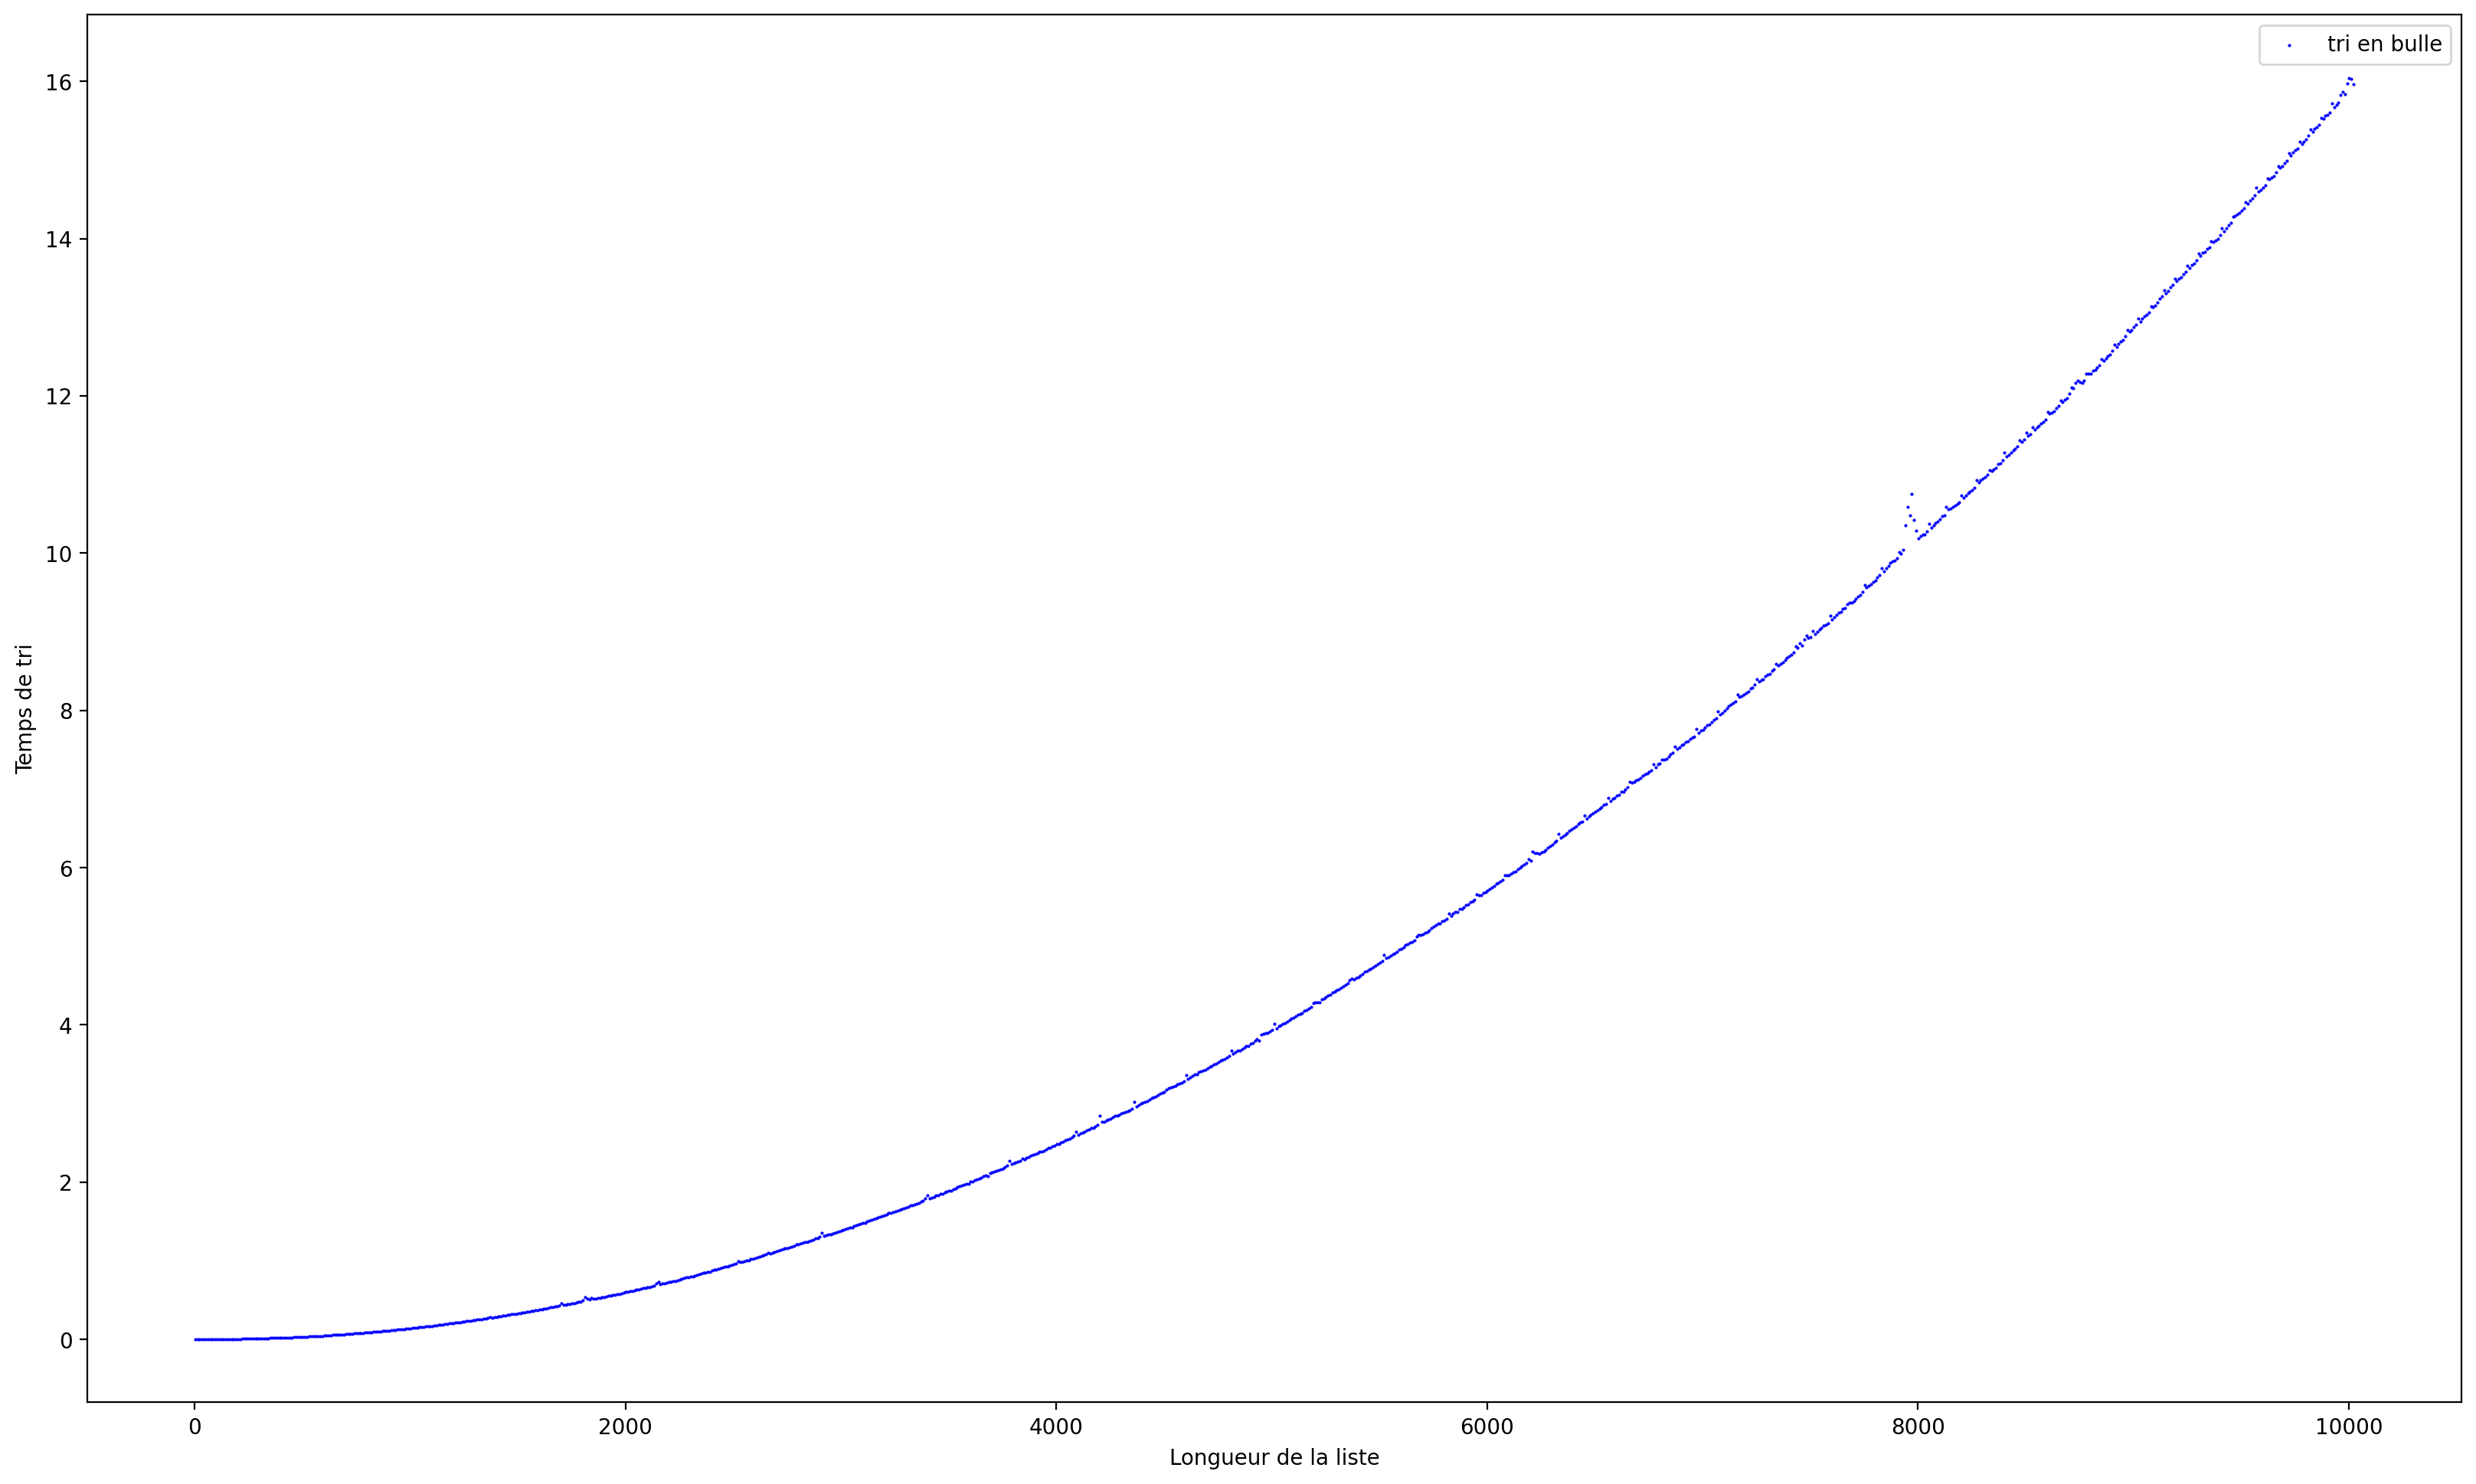

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x, y, marker=".", label="tri en bulle", color="blue", s=1)
plt.xlabel("Longueur de la liste")
plt.rcParams['figure.dpi'] = 200
plt.rcParams["figure.figsize"] = [20, 12]
plt.ylabel("Temps de tri")
plt.legend()
plt.show()

> On remarque que le nuage de points semble se regrouper autour d'une courbe convexe et croissante.
> Il y a néanmoins des points dispersés ça et là; le chronometrage étant une mesure peu exacte, nous nous contenterons d'etudier les points les plus proches de la courbe. Les valeurs importent peu, leur evolution est l'objectif de notre etude.
> 

## Definir l'expression de la courbe
### Definir l'expression de la derivée
> La derivee de la fonction de la courbe $C_{bubble}$ est la fonction qui pour chaque abcisse *x*, associe *y* 
le coefficient directeur de la tangente à $C_{bubble}$ au point *(x,y)*  
Tracons les tangentes en chaque point *p*
    Pour tracer la tangente en un point  ***p***  a la courbe ***C***, on calcule le coefficient directeur de la droite passant par les points ***p-1*** et ***p+1*** (points adjacents sur la courbe).  
    Cette tangente est de la forme ***ax+b= y***  ou  ***a = $\frac{y_{p+1}-y_{p-1}}{x_{p+1}-x_{p-1}}$***

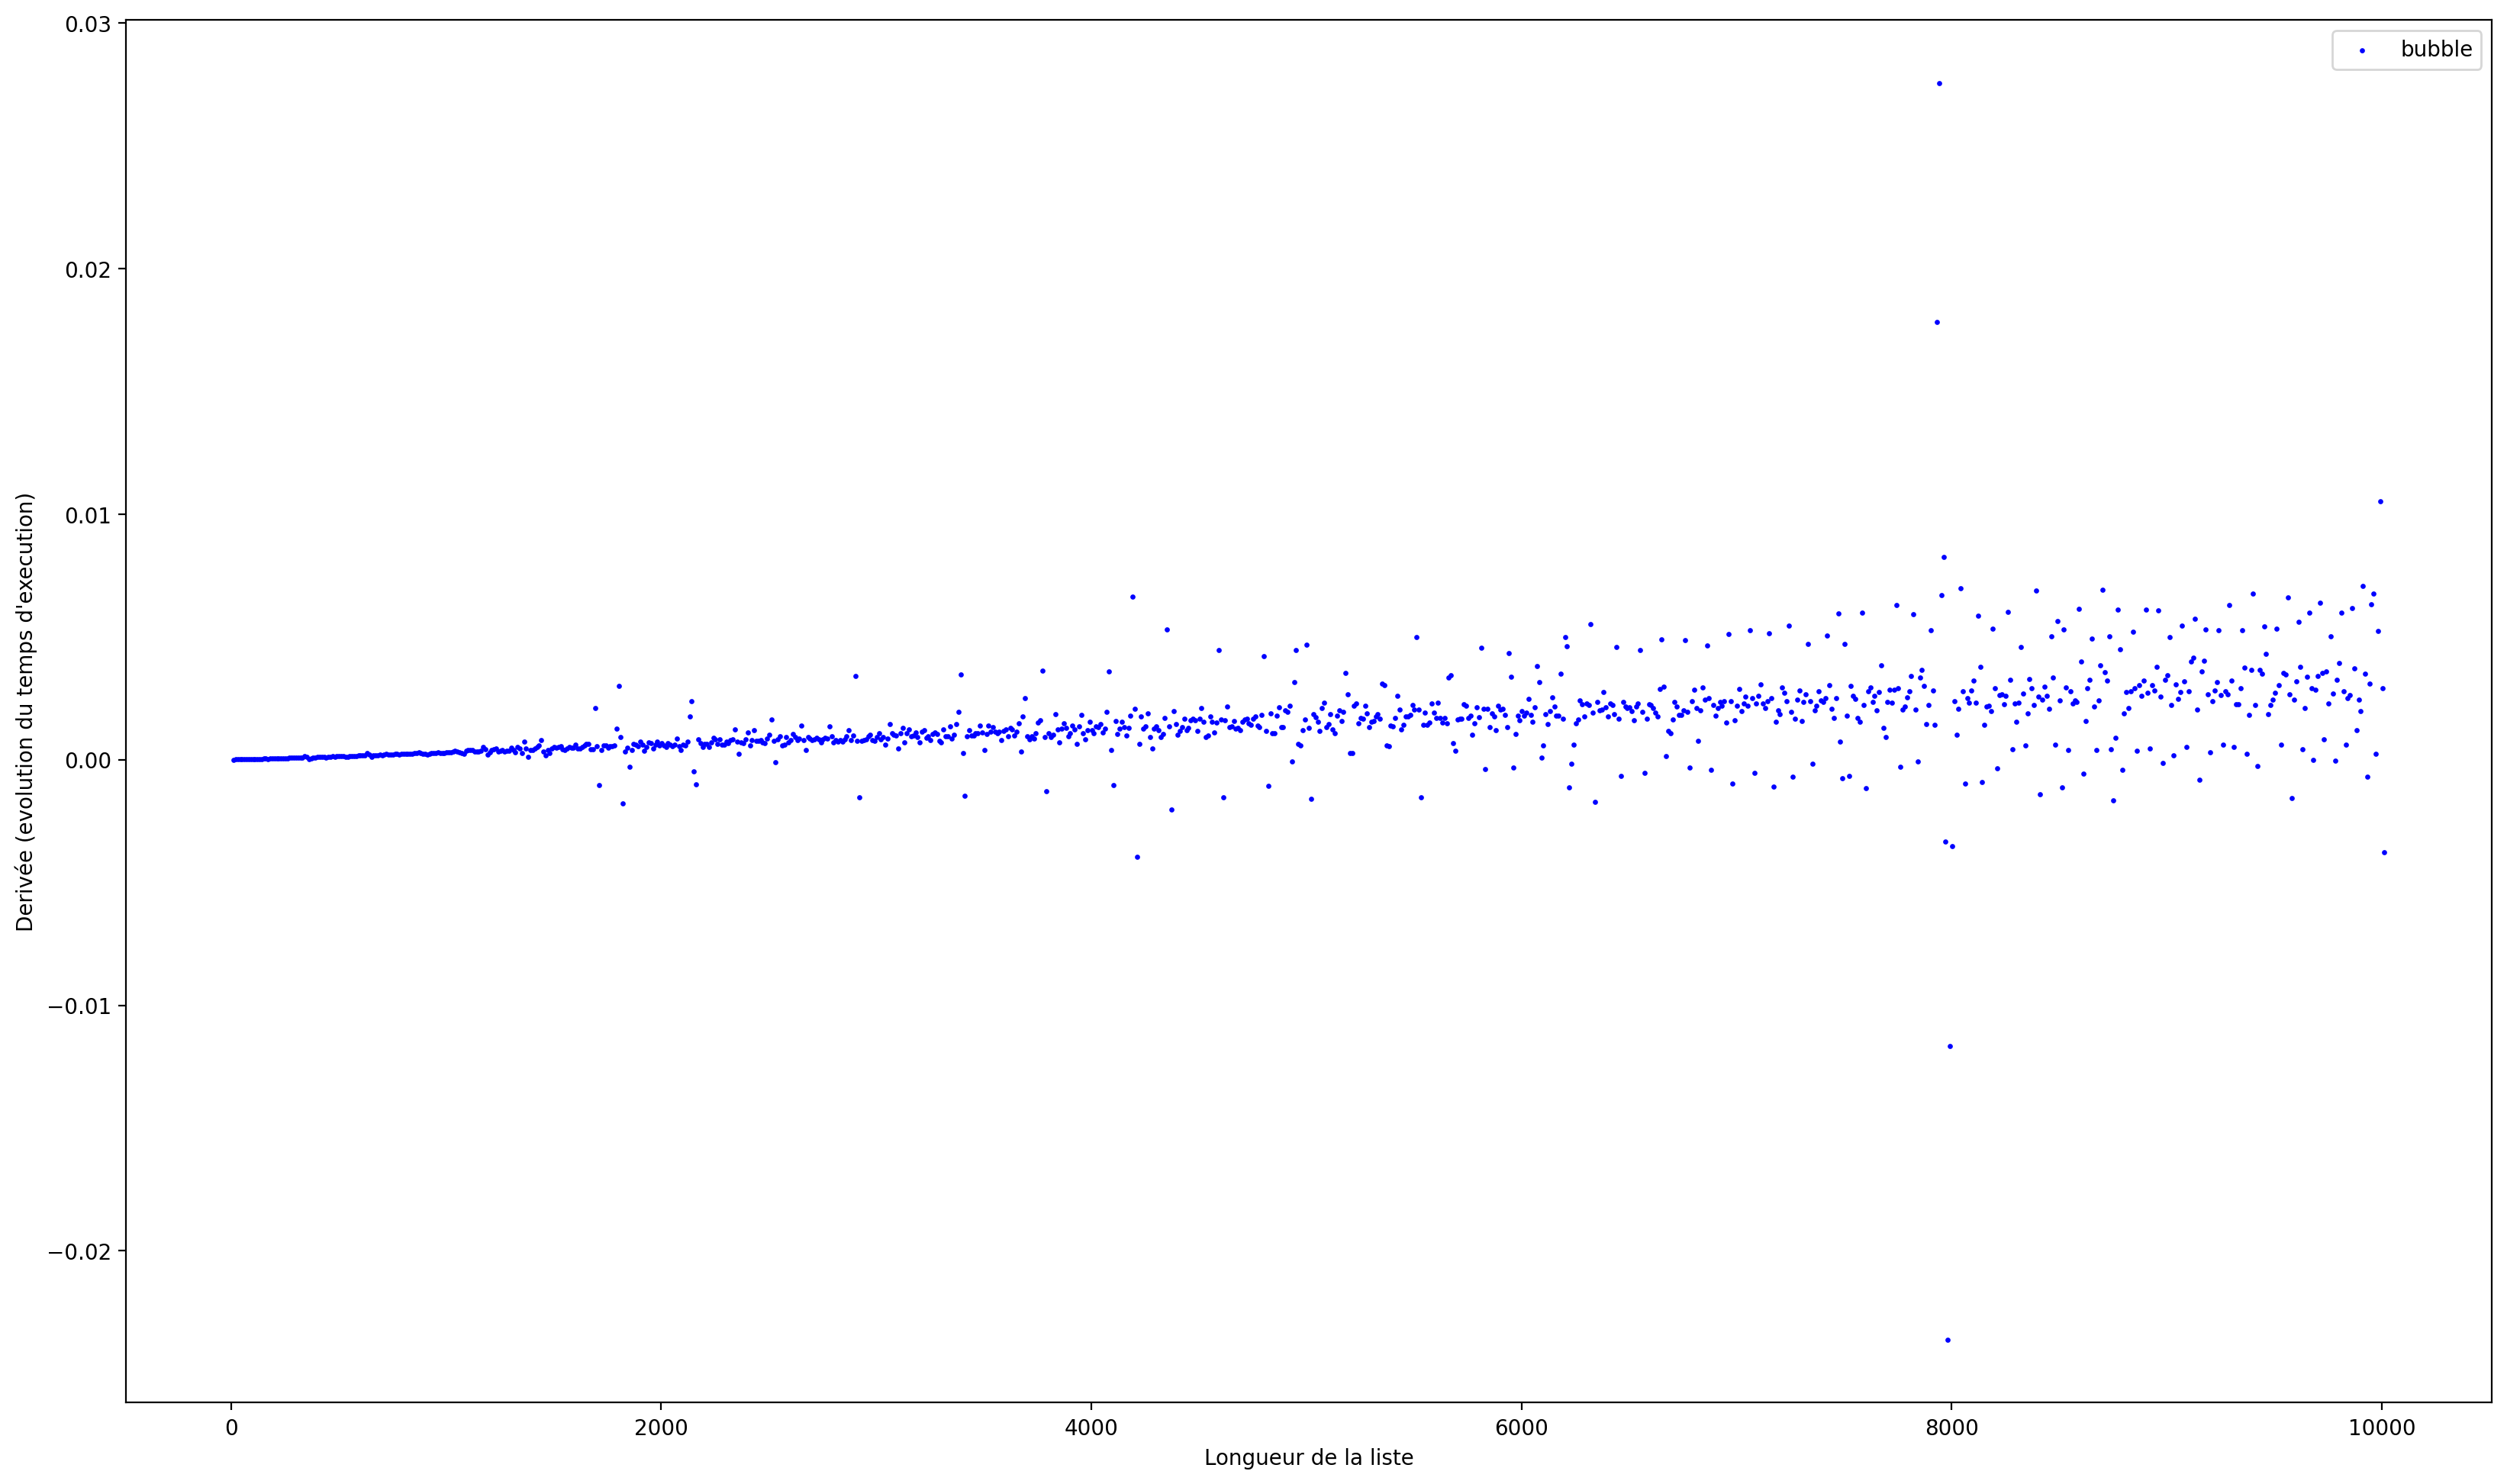

In [6]:
derivee_list = []
for i, j in enumerate(y[1:-1]):
    y1, y1p2 = y[i], y[i+2]
    x1, x1p2 = x[i], x[i+2]
    derivee = (y1p2 - y1)/(x1p2 - x1)
    derivee_list.append(derivee)

import matplotlib.pyplot as plt
plt.scatter(x[1:-1], derivee_list, label="bubble", marker='o',color="blue", s=2)
plt.xlabel("Longueur de la liste")
plt.ylabel("Derivée (evolution du temps d'execution)")
plt.legend()
plt.show()

> En placant sur un graphe les differentes valeurs de *f'(x)* (Bubble Sort); on remarque que les points semblent se distribuer autour d'une droite.  
On peut alors dire que f'(x) est une fonction affine qui peut s'ecrire sous la forme *ax+b*.  

### Comment trouver l'expression de la droite qui modelise le plus fidelement un nuage de point?
> Afin de trouver la meilleure modelisation qui relie la variable x (longueur de la liste) et y (derivée en x), on pratique une regression linéaire.

a = 3.2336008519473345e-07         b = -2.2393743899068322e-05


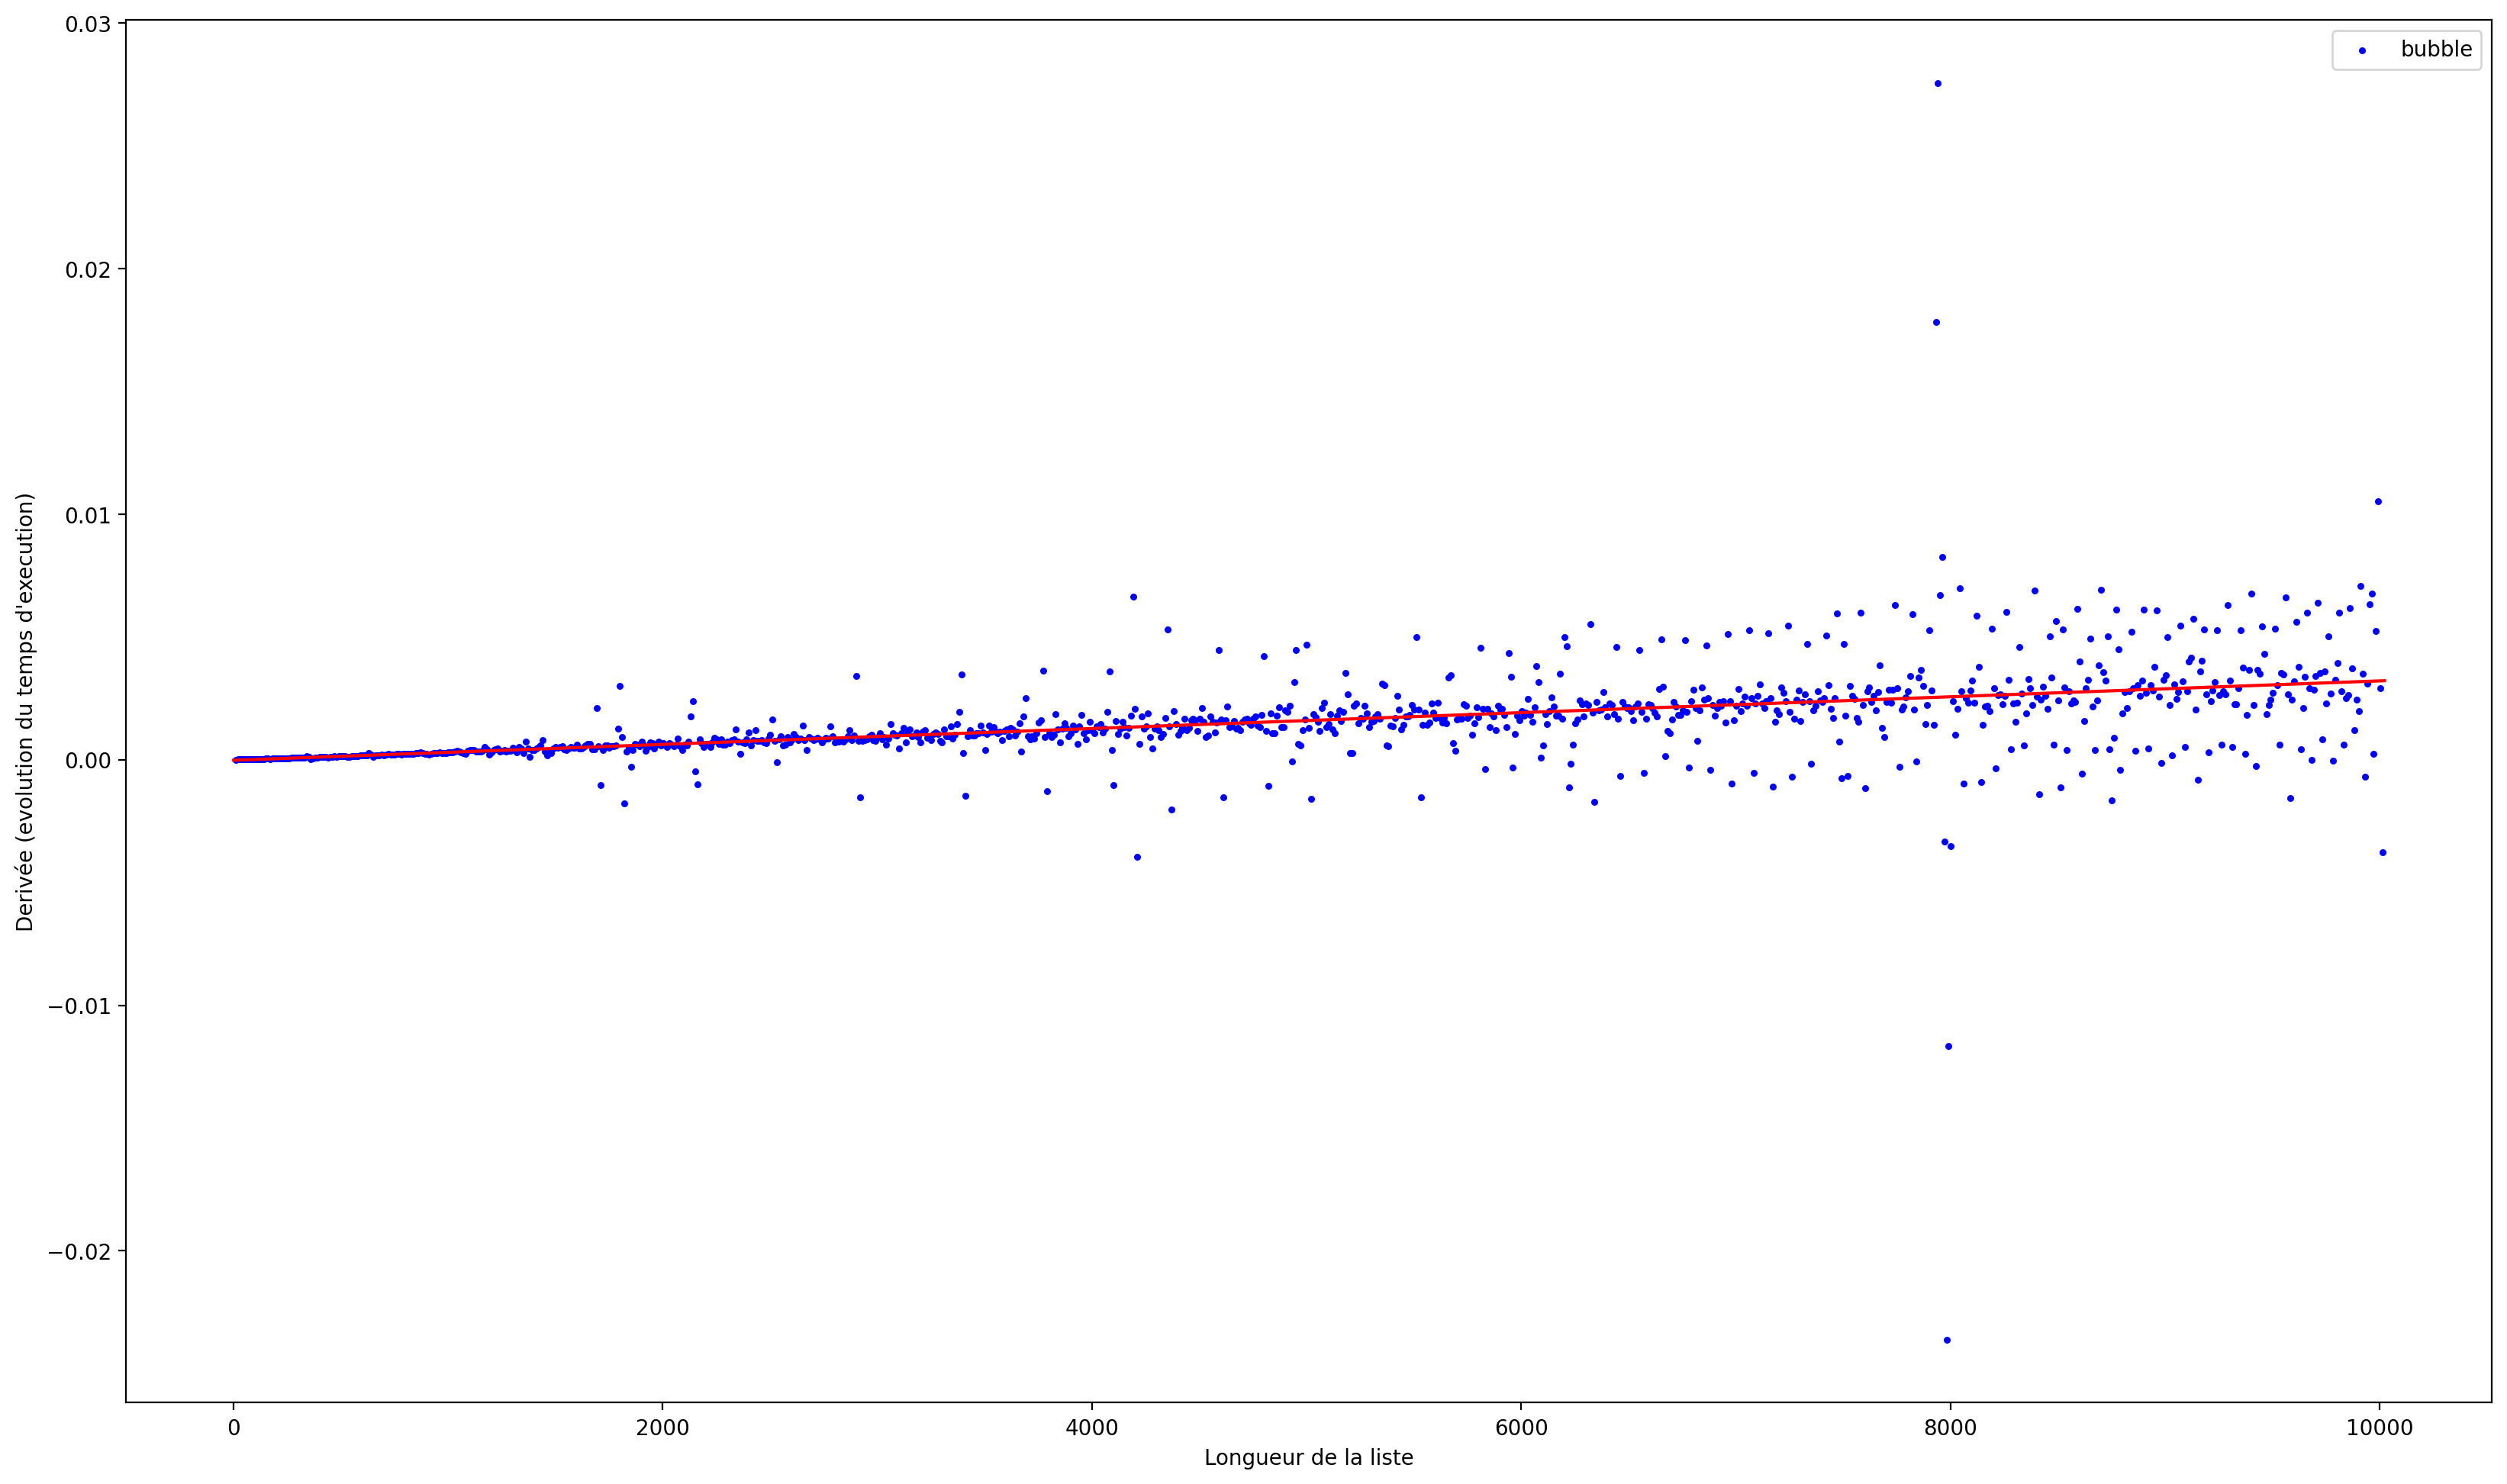

In [7]:
def linreg(xs,ys):
    moyenne_x = sum(xs)/len(xs)
    moyenne_y = sum(ys)/len(ys)
    xi_moins_xbar = [x - moyenne_x for x in xs]
    xi_moins_xbar_carre = [x**2 for x in xi_moins_xbar]
    yi_moins_ybar = [y - moyenne_y for y in ys]
    numerateur = [x*y for x, y in zip(xi_moins_xbar, yi_moins_ybar)]
    a = sum(numerateur)/sum(xi_moins_xbar_carre)
    b = moyenne_y - (a * moyenne_x)
    return (a,b)

a, b = linreg(x[1:-1], derivee_list)
print("a =",a,"        b =", b)
abcisse = list(range(2, 10025,10))
ordonnee = [a * x + b for x in abcisse]
plt.plot(abcisse, ordonnee, color="red")
plt.scatter(x[1:-1], derivee_list, label="bubble", marker='o',color="blue", s=5)
plt.xlabel("Longueur de la liste")
plt.ylabel("Derivée (evolution du temps d'execution)")
plt.legend()
plt.show()

> La derivée peut alors etre ecrite sous la forme ax+b où <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;a=3.2336008519473345e-07  et  b=-2.2393743899068322e-05

### Definir l'expression de la courbe

> sachant que ***f'(x)*** = ax + b (les coefficients a et b definis ci-dessus)
&nbsp;&nbsp;&nbsp;Quelle est la fonction dont la derivée donne ax + b ?
<br>Pour repondre a cela, nous devons trouver la primitive de ax+b.
<br>on procede par decomposition (la primite etant additive).
<br>la primitive de ax est  $\frac{1}{2}$ax².
<br>la primitive de b est bx.
<br>la primitive de 0 est une constante inconnue, il's'agit de l'ordonnee a l'origine; or on sait que pour une liste de 0 element, l'algorithme prend 0 secondes (pas de traitment necessaire)
la constante c est donc nul.
<br>la primitive de ax+b est donc ax²+bx

> Verifions visuellement si cette fonction modelise bien le nuage de point du temps d'execution de l'algorithme en fonction de la longueur de la liste a traiter.

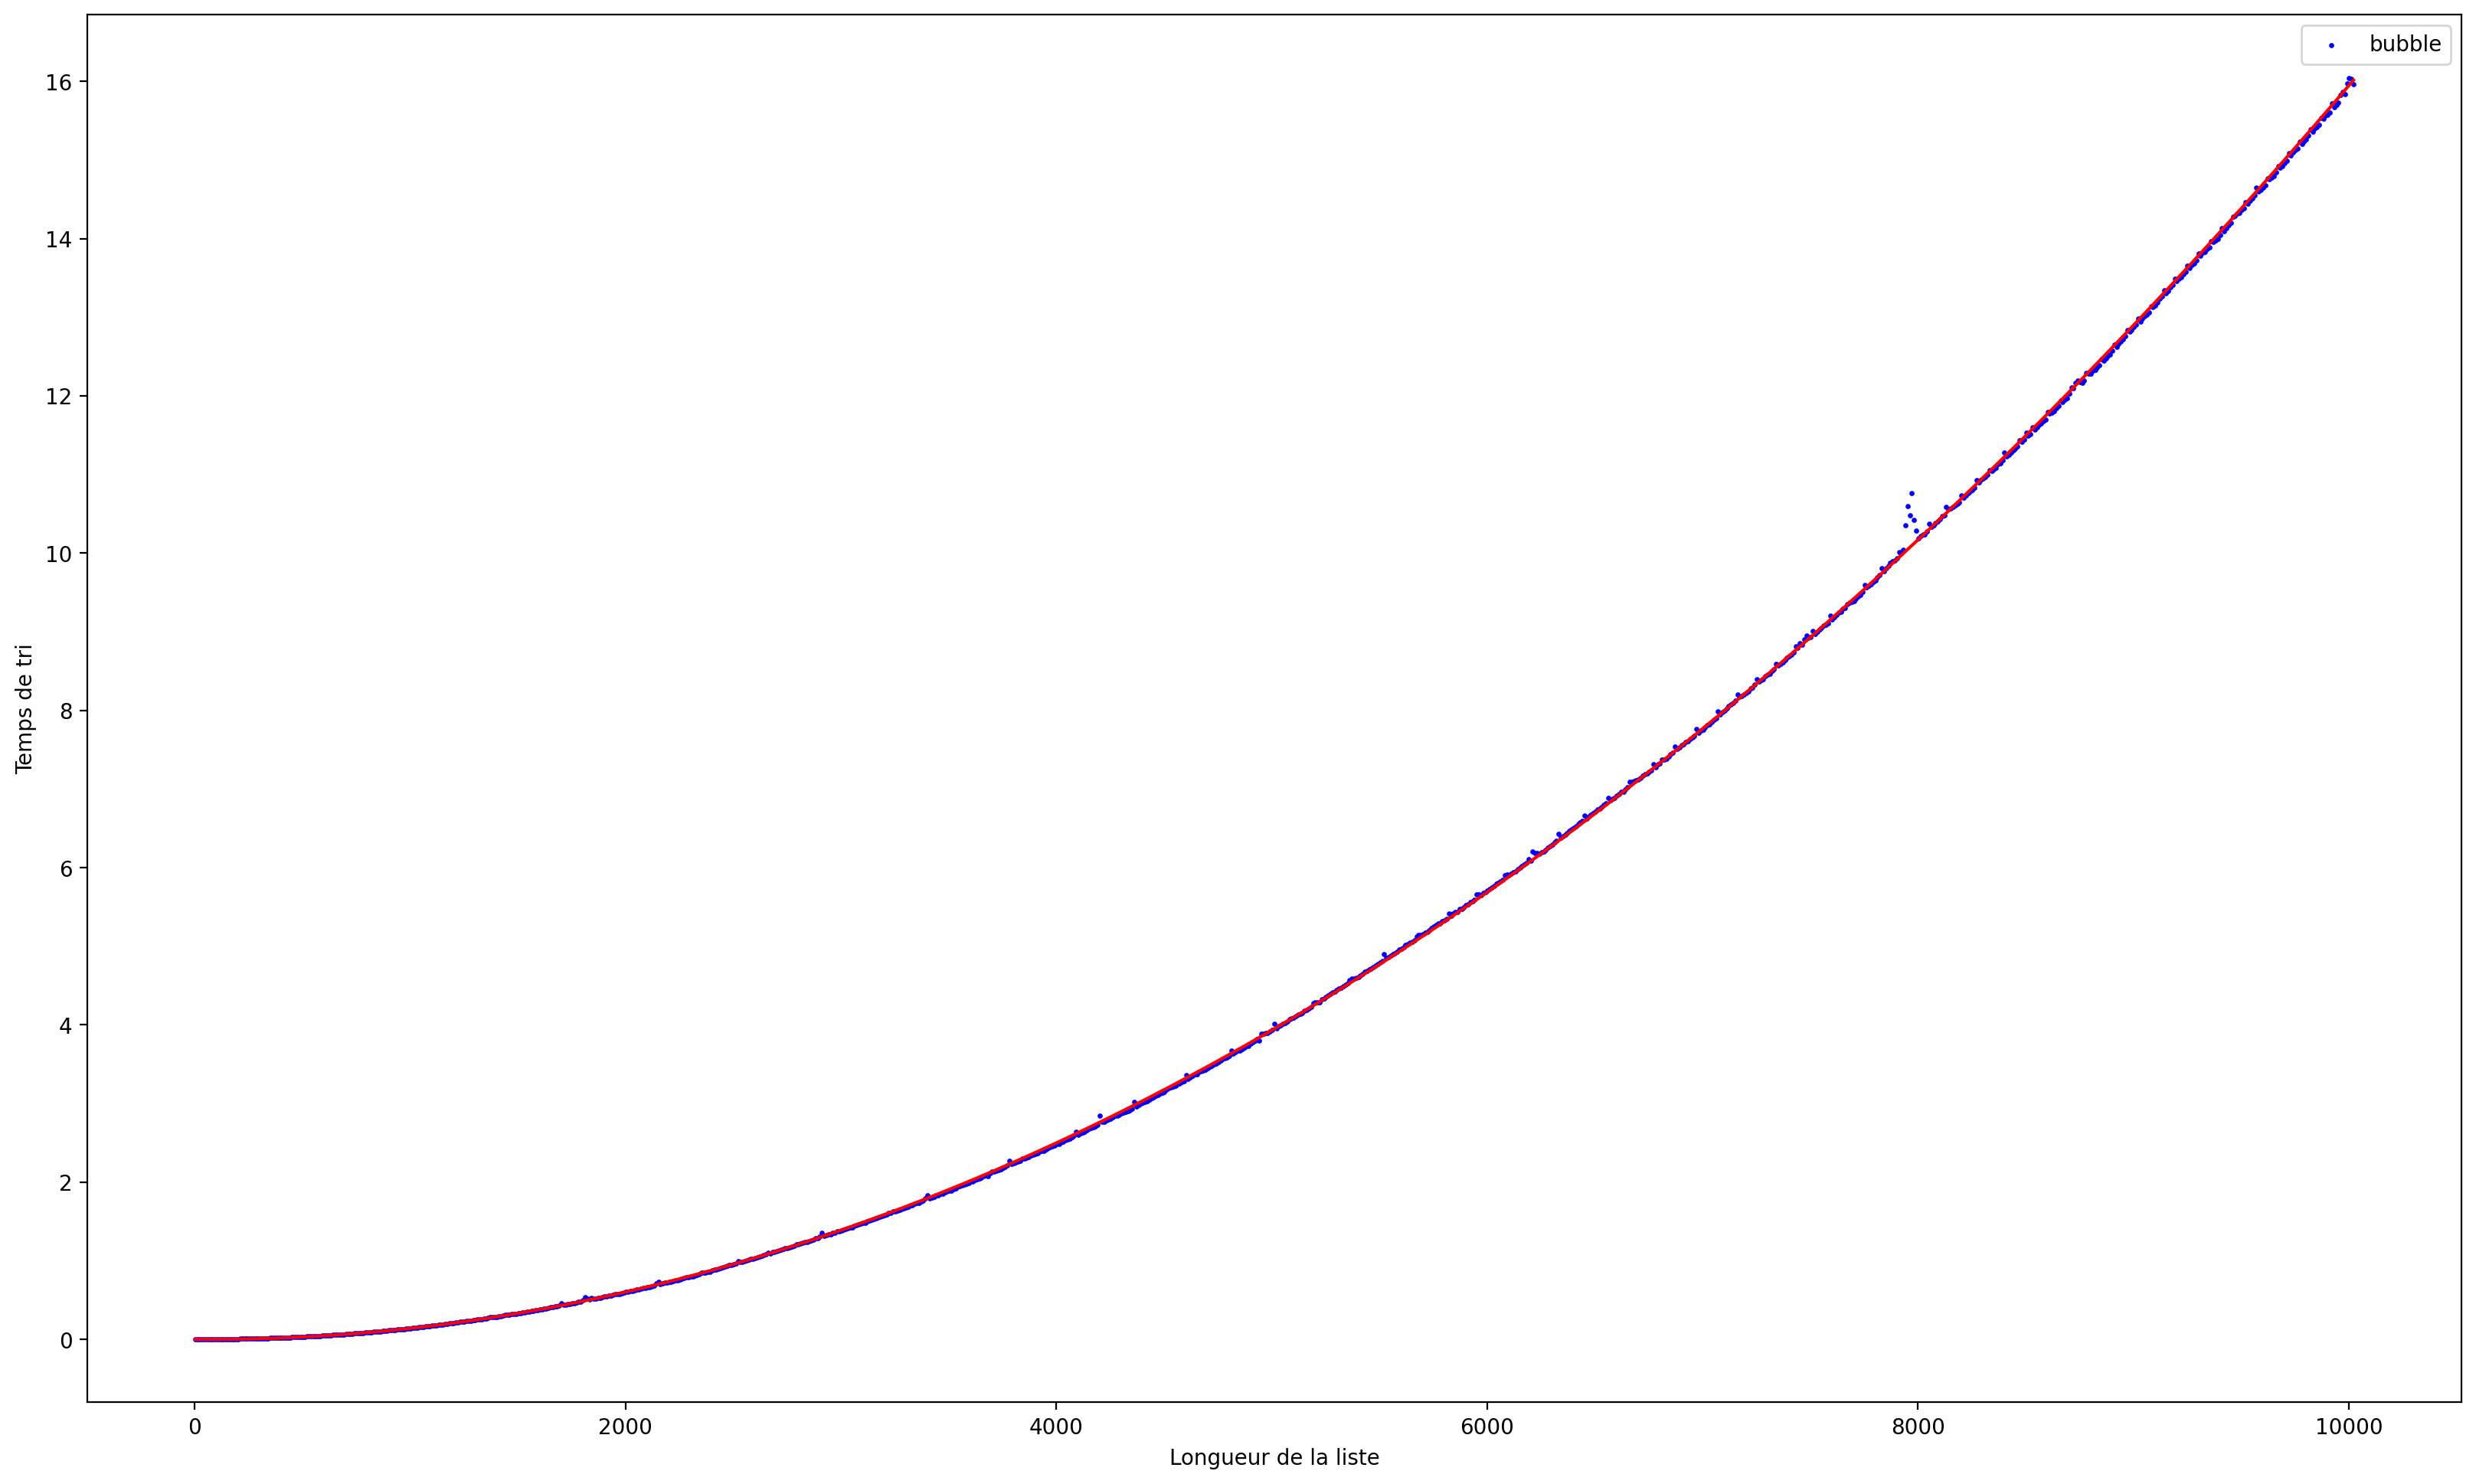

In [8]:
prediction_time_list = [0.5*a*x**2 + b * x for x in abcisse]
plt.plot(abcisse, prediction_time_list, color="red")
plt.scatter(range(2, 10025,10), y,label="bubble", marker='o',color="blue", s=2)
plt.xlabel("Longueur de la liste")
plt.ylabel("Temps de tri")
plt.legend()
plt.show()

> Cette courbe semble bien modeliser les resulatats experimentaux.
> Sachant que notre modele a été concu pour des x de 0 a 10000, testons son efficacite sur une liste de 30000 elements

In [9]:
n = 30000
0.5 * a * n**2 + b * n

144.840226020658

In [11]:
from numpy import float64
from time import perf_counter as now
from json import loads
from sys import setrecursionlimit
setrecursionlimit(10**6)
with open("data/numbers.json","r") as d:
    data = loads(d.read())
subdata = data[:30000]
times_list = []
for j in range(3):
    bubble_time_start = float64(now())
    bubbleSort(subdata)
    bubble_time_end = float64(now())
    bubble_execution_time = bubble_time_end - bubble_time_start
    times_list.append(bubble_execution_time)
bubble_execution_time = sum(times_list)/len(times_list)
print(bubble_execution_time)

148.357005171

>Ainsi notre modele a 2% de precision en moins, ce qui est correcte pour une prediction sur le triple des resultats de conception du modele.

<br><br>
>De maniere plus generale, nous savons que l'algorithme de tri en bulle suit un modele polynomiale du second degré. Ainsi en doublant la longueur de la liste, le temps d'execution sera de (2x)²a + b2x.

>On note O(n²) la complexité de cette algorithme.